In [5]:
import pandas as pd 
#for the importing dataset
import numpy as np
%matplotlib inline 
#to plot the whatever graphic
import matplotlib.pyplot as plt #plot data
#import common libaries
from statsmodels.tsa.arima_model import ARMA,ARMAResults,ARIMA,ARIMAResults

2015-09-07    14600
2015-09-08    14800
2015-09-09    14800
2015-09-10    14800
2015-09-11    14800
              ...  
2022-11-24     7860
2022-11-25     8410
2022-11-28     8960
2022-11-29     8920
2022-11-30     9050
Name: price, Length: 1812, dtype: int64

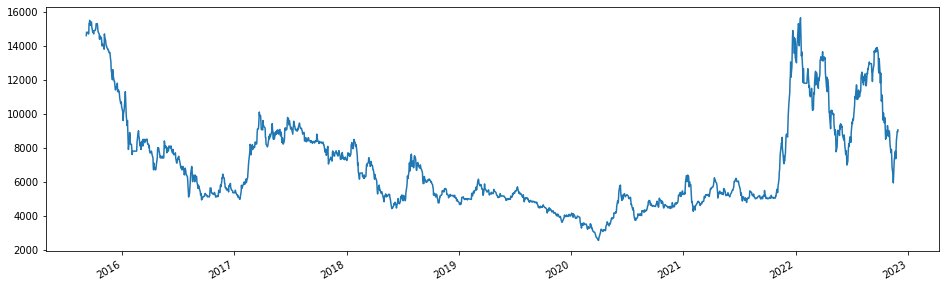

In [8]:
#import the dataset 
HAG=pd.read_csv(r"/content/HAGLdataset (4).csv")
HAG.index = HAG['date']
# Convert the 'date' column to a datetime data type
HAG['date']=pd.to_datetime(HAG.date,format='%m/%d/%Y')
#set the date as the index
HAG=HAG.set_index(pd.DatetimeIndex(HAG['date'].values))
HAG['Time'] = np.arange(len(HAG.index))
HAG['price'].plot(figsize=(16,5))
HAG['price']

,price,Open,High,Low,Time
count,1812.000000,1812.000000,1812.000000,1812.000000,1812.000000
mean,6989.701987,7000.524283,7141.986755,6866.313466,905.500000
std,2831.815190,2840.975405,2915.588395,2769.333004,523.223662
min,2550.000000,2450.000000,2630.000000,2400.000000,0.000000
25%,5040.000000,5040.000000,5100.000000,4980.000000,452.750000
50%,5870.000000,5900.000000,6005.000000,5765.000000,905.500000
75%,8400.000000,8400.000000,8550.000000,8290.000000,1358.250000
max,15650.000000,15950.000000,16200.000000,15300.000000,1811.000000


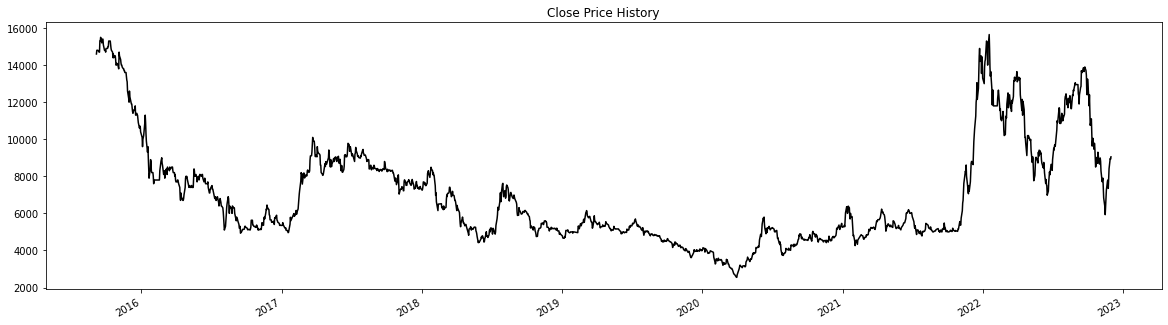

In [3]:
plt.figure(figsize=(20,12))
plt.subplot(2, 1, 1)
plt.title('Close Price History')
#the figure has 2 row, 1 columns, and this plot is the first plot. 
HAG['price'].plot(style="k")
# plt.subplot(2, 1, 2)
# #the figure has 2 row, 1 columns, and this plot is the second plot. 
# POW['Vol'].plot(style="k")
# plt.title('Volume History')
HAG.describe()

Kiem dinh ADF coi thu chuoi co nghiem don vi hay khong va tinh dung





In [4]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(HAG['price'].dropna() )
print('ADF Statistic: {} '.format(result[0]))
print('p-value: {} '.format(result[1]))
print('Critical value : {} ')
for key,value in result[4].items():
            print('\t{}: {}'.format(key, value))
if result[1] <= 0.05:
        print("Strong evidence against the null hypothesis")
        print("Reject the null hypothesis")
        print("Data has no unit root and is stationary")
else:
        print("Weak evidence against the null hypothesis")
        print("Fail to reject the null hypothesis")
        print("Data has a unit root and is non-stationary")

ADF Statistic: -3.3663943638018137 
p-value: 0.012159244536145706 
Critical value : {} 
	1%: -3.4339921916016345
	5%: -2.8631488249300574
	10%: -2.5676264862577503
Strong evidence against the null hypothesis
Reject the null hypothesis
Data has no unit root and is stationary


The output above shows that the p-value is greater than the significance level of 0.05, so we fail to reject the null hypothesis. The series is not stationary and requires differencing.

In [5]:
from statsmodels.tsa.statespace.tools import diff
result = adfuller(HAG['price'].diff().dropna() )
print('ADF Statistic: {} '.format(result[0]))
print('p-value: {} '.format(result[1]))
print('Critical value : {} ')
for key,value in result[4].items():
            print('\t{}: {}'.format(key, value))
if result[1] <= 0.05:
        print("Strong evidence against the null hypothesis")
        print("Reject the null hypothesis")
        print("Data has no unit root and is stationary")
else:
        print("Weak evidence against the null hypothesis")
        print("Fail to reject the null hypothesis")
        print("Data has a unit root and is non-stationary")

ADF Statistic: -9.953630667442274 
p-value: 2.477032638105299e-17 
Critical value : {} 
	1%: -3.4339921916016345
	5%: -2.8631488249300574
	10%: -2.5676264862577503
Strong evidence against the null hypothesis
Reject the null hypothesis
Data has no unit root and is stationary


In [1]:
! pip install pmdarima
import warnings 
warnings.filterwarnings('ignore')

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import pmdarima as pm

In [9]:
model  = pm.auto_arima(HAG['price'],
                      test='adf',       # use adftest to find optimal 'd' # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)     # set to stepwise
print(model.summary())

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=24952.820, Time=2.73 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=24981.245, Time=0.08 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=24969.200, Time=0.11 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=24967.358, Time=0.21 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=24979.543, Time=0.04 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=24966.854, Time=0.86 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=24966.062, Time=0.83 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=24955.340, Time=2.20 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=24953.942, Time=3.29 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=24966.246, Time=0.73 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=24958.289, Time=4.31 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=24955.156, Time=3.01 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=24951.089, Time=2.96 sec
 ARIMA(4,1,3)(0,0,0)[0] intercept   : AIC=24948.370, Time=4.83 sec
 ARIMA(4,1,2)(0,0,0

In the above output, the lowest AIC value of Best model:  ARIMA(4,1,0), and that is used as the final estimator.

> Indented block



